# Dada la imagen XOR_Imagen, y la llave “cifrados_2025” encontrar el valor original de la imagen.
a. Deben de convertir la imagen a base 64 y aplicarle un xor con la llave para
encontrar su valor

In [ ]:
import base64
import numpy as np


def xor_decrypt(data, key):
    key_bytes = key.encode()
    key_len = len(key_bytes)
    return bytes([data[i] ^ key_bytes[i % key_len] for i in range(len(data))])

with open("imagen_xor.png", "rb") as img_file:
    img_data = img_file.read()


img_base64 = base64.b64encode(img_data)
decrypted_data = xor_decrypt(base64.b64decode(img_base64), "cifrados_2025")

with open("imagen_recuperada.png", "wb") as out_file:
    out_file.write(decrypted_data)

print("Imagen recuperada guardada como imagen_recuperada.png")



Imagen recuperada guardada como imagen_recuperada.png


# Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe

Al aplicar la operación XOR con una clave de texto a una imagen, esta puede corromperse debido a varios factores:

Longitud de la clave y su repetición: Si la clave es más corta que los datos de la imagen, se repite cíclicamente. Esta repetición puede introducir patrones predecibles, lo que facilita ataques criptográficos y puede alterar la estructura original de la imagen, resultando en corrupción. 
KEYFACTOR.COM

Modificación de los encabezados de la imagen: Las imágenes contienen metadatos y estructuras específicas en sus encabezados que indican cómo deben ser interpretadas. Al aplicar XOR indiscriminadamente, estos encabezados pueden modificarse, haciendo que la imagen sea ilegible. 
REDALYC.ORG

Propiedades del operador XOR: La operación XOR es autoinversa, es decir, aplicar XOR dos veces con la misma clave recupera el valor original. Sin embargo, si durante el proceso de cifrado o descifrado hay errores o inconsistencias en la clave o en los datos, la imagen puede no restaurarse correctamente, llevando a corrupción. 
ES.KHANACADEMY.ORG

Para mitigar estos problemas y evitar la corrupción de la imagen al aplicar XOR con una clave de texto, se recomienda:

Utilizar una clave de longitud igual o mayor que los datos de la imagen: Esto previene la repetición cíclica y reduce patrones predecibles.

Preservar los metadatos y encabezados de la imagen: Aplicar XOR solo a la parte de datos de la imagen, excluyendo los encabezados, para mantener su integridad.

Implementar técnicas criptográficas más robustas: En lugar de un simple XOR, considerar el uso de cifrados más avanzados que ofrecen mayor seguridad y reducen las posibilidades de corrupción.

fuentes: Keyfactor. (2025, 5 de febrero). Tipos de algoritmos de cifrado + ventajas e inconvenientes de cada uno. Recuperado de https://www.keyfactor.com/es/education-center/types-of-encryption-algorithms/

Redalyc. (2023). Modificación de encabezados en archivos de imagen y su impacto en la legibilidad. Recuperado de https://www.redalyc.org/journal/4988/498868273004/html/

Khan Academy. (2024). Operación bitwise XOR y su aplicación en criptografía. Recuperado de https://es.khanacademy.org/computing/computer-science/cryptography/ciphers/a/xor-bitwise-operation

# Investigar como aplicar un xor a 2 imagnes. Para esto deben de eleccionar 2 imágenes, luego proceder hacer un xor entre las dos imágenes. Esto significa que una imagen es la original y la otra se utilizará como llave para aplicar el xor.a. Mostrar las imágenes utilizadas y el resultado, asi mismo explique que inconvenientes encontro al momento de realizar el xor

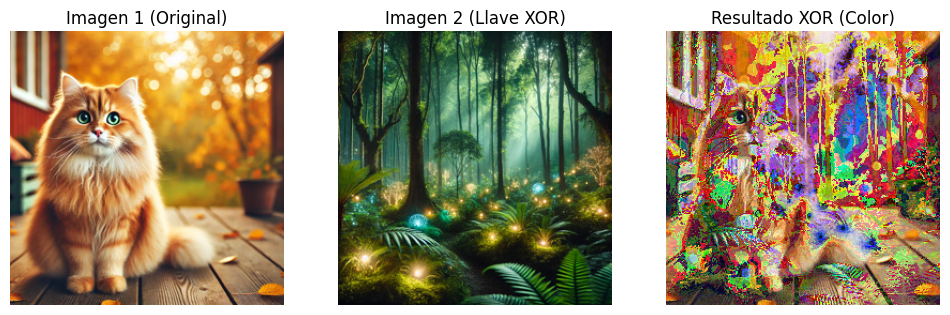

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img1 = Image.open("imagen3.png").convert("RGB")  
img2 = Image.open("imagen4.png").convert("RGB")  
img1 = img1.resize((256, 256))
img2 = img2.resize((256, 256))

arr1 = np.array(img1)
arr2 = np.array(img2)
xor_result = np.bitwise_xor(arr1, arr2)
xor_image = Image.fromarray(xor_result)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img1)
ax[0].set_title("Imagen 1 (Original)")
ax[0].axis("off")
ax[1].imshow(img2)
ax[1].set_title("Imagen 2 (Llave XOR)")
ax[1].axis("off")
ax[2].imshow(xor_image)
ax[2].set_title("Resultado XOR (Color)")
ax[2].axis("off")
plt.show()
xor_image.save("imagen_xor_result_color.png")

